<a href="https://colab.research.google.com/github/Abdelhak-mekaoui/Data-Science-London-Scikit-learn/blob/main/Data_Science_London_%2B_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science London + Scikit-learn


## Importing the libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [46]:
train_data = pd.read_csv('train.csv',header=None)
test_data = pd.read_csv('test.csv',header=None)
train_label= pd.read_csv('trainLabels.csv',header=None)

In [47]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [48]:
train_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

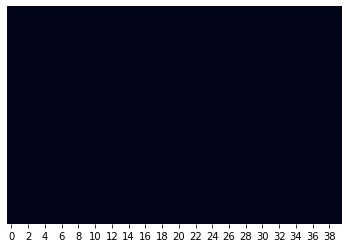

In [49]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [50]:
X=train_data.iloc[:,:].values
y=train_label.values
X_test=test_data.iloc[:,:].values

In [51]:
print(X.shape)
print(y.shape)
print(X_test.shape)

(1000, 40)
(1000, 1)
(9000, 40)


# Spliting the dataset into training set and cross validation set 

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training Classification models on X_train and evaluation on X_cv

## RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

max_depth=range(5,20)
min_samples_split=range(2,15)
J_train = []
J_cv = []
best = [5,2]
for md in max_depth:
  for ms in min_samples_split:
    print(f"\n==========================={md}============={ms}==========================\n")
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                        max_depth=md ,
                                        min_samples_split=ms ,
                                        random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred_t = classifier.predict(X_train)
    y_pred_cv = classifier.predict(X_cv)
    cm = confusion_matrix(y_cv, y_pred_cv)
    print(cm)
    Rt = accuracy_score(y_train, y_pred_t)
    Rcv = accuracy_score(y_cv, y_pred_cv)
    print(f"Train score : {Rt} CV score {Rcv}")
    if md!=5 and ms!=2 and (Rcv > max(J_cv)) :
      best=[md,ms]
    J_train.append(Rt)
    J_cv.append(Rcv)


===========================5=============2==========================

[[69 20]
 [19 92]]
Train score : 0.915 CV score 0.805

===========================5=============3==========================

[[69 20]
 [19 92]]
Train score : 0.915 CV score 0.805

===========================5=============4==========================

[[70 19]
 [22 89]]
Train score : 0.915 CV score 0.795

===========================5=============5==========================

[[68 21]
 [19 92]]
Train score : 0.92125 CV score 0.8

===========================5=============6==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1

[[65 24]
 [17 94]]
Train score : 0.92125 CV score 0.795

===========================5=============7==========================

[[66 23]
 [18 93]]
Train score : 0.93125 CV score 0.795

===========================5=============8==========================

[[66 23]
 [18 93]]
Train score : 0.93125 CV score 0.795

===========================5=============9==========================

[[68 21]
 [20 91]]
Train score : 0.9125 CV score 0.795

===========================5=============10==========================

[[69 20]
 [20 91]]
Train score : 0.91125 CV score 0.8

===========================5=============11==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1

[[69 20]
 [19 92]]
Train score : 0.91125 CV score 0.805

===========================5=============12==========================

[[74 15]
 [19 92]]
Train score : 0.915 CV score 0.83

===========================5=============13==========================

[[71 18]
 [20 91]]
Train score : 0.91375 CV score 0.81

===========================5=============14==========================

[[71 18]
 [20 91]]
Train score : 0.9125 CV score 0.81

===========================6=============2==========================

[[71 18]
 [18 93]]
Train score : 0.9525 CV score 0.82

===========================6=============3==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1

[[75 14]
 [18 93]]
Train score : 0.94625 CV score 0.84

===========================6=============4==========================

[[73 16]
 [18 93]]
Train score : 0.95125 CV score 0.83

===========================6=============5==========================

[[72 17]
 [22 89]]
Train score : 0.95 CV score 0.805

===========================6=============6==========================

[[77 12]
 [18 93]]
Train score : 0.9525 CV score 0.85

===========================6=============7==========================

[[72 17]
 [17 94]]
Train score : 0.95625 CV score 0.83

===========================6=============8==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1

[[73 16]
 [16 95]]
Train score : 0.9475 CV score 0.84

===========================6=============9==========================

[[72 17]
 [18 93]]
Train score : 0.9475 CV score 0.825

===========================6=============10==========================

[[71 18]
 [21 90]]
Train score : 0.94875 CV score 0.805

===========================6=============11==========================

[[71 18]
 [21 90]]
Train score : 0.94625 CV score 0.805

===========================6=============12==========================

[[72 17]
 [22 89]]


<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1

Train score : 0.94125 CV score 0.805

===========================6=============13==========================

[[70 19]
 [20 91]]
Train score : 0.9375 CV score 0.805

===========================6=============14==========================

[[73 16]
 [25 86]]
Train score : 0.93375 CV score 0.795

===========================7=============2==========================

[[69 20]
 [20 91]]
Train score : 0.96375 CV score 0.8

===========================7=============3==========================

[[70 19]
 [19 92]]


<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


Train score : 0.97375 CV score 0.81

===========================7=============4==========================

[[68 21]
 [16 95]]
Train score : 0.98 CV score 0.815

===========================7=============5==========================

[[76 13]
 [17 94]]
Train score : 0.97125 CV score 0.85

===========================7=============6==========================

[[70 19]
 [16 95]]
Train score : 0.9675 CV score 0.825

===========================7=============7==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[70 19]
 [14 97]]
Train score : 0.97625 CV score 0.835

===========================7=============8==========================

[[67 22]
 [14 97]]
Train score : 0.95625 CV score 0.82

===========================7=============9==========================

[[73 16]
 [17 94]]
Train score : 0.9625 CV score 0.835

===========================7=============10==========================

[[72 17]
 [17 94]]
Train score : 0.9725 CV score 0.83

===========================7=============11==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[73 16]
 [14 97]]
Train score : 0.96125 CV score 0.85

===========================7=============12==========================

[[71 18]
 [15 96]]
Train score : 0.95625 CV score 0.835

===========================7=============13==========================

[[69 20]
 [14 97]]
Train score : 0.95375 CV score 0.83

===========================7=============14==========================

[[73 16]
 [20 91]]
Train score : 0.95375 CV score 0.82

===========================8=============2==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[73 16]
 [15 96]]
Train score : 0.9825 CV score 0.845

===========================8=============3==========================

[[ 69  20]
 [ 11 100]]
Train score : 0.97875 CV score 0.845

===========================8=============4==========================

[[73 16]
 [16 95]]
Train score : 0.97625 CV score 0.84

===========================8=============5==========================

[[77 12]
 [18 93]]
Train score : 0.98375 CV score 0.85

===========================8=============6==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[74 15]
 [17 94]]
Train score : 0.98625 CV score 0.84

===========================8=============7==========================

[[76 13]
 [17 94]]
Train score : 0.9775 CV score 0.85

===========================8=============8==========================

[[72 17]
 [16 95]]
Train score : 0.97 CV score 0.835

===========================8=============9==========================

[[73 16]
 [18 93]]
Train score : 0.9725 CV score 0.83

===========================8=============10==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[70 19]
 [20 91]]
Train score : 0.96125 CV score 0.805

===========================8=============11==========================

[[69 20]
 [16 95]]
Train score : 0.96 CV score 0.82

===========================8=============12==========================

[[71 18]
 [16 95]]
Train score : 0.9575 CV score 0.83

===========================8=============13==========================

[[72 17]
 [14 97]]
Train score : 0.96 CV score 0.845

===========================8=============14==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[72 17]
 [16 95]]
Train score : 0.9525 CV score 0.835

===========================9=============2==========================

[[77 12]
 [23 88]]
Train score : 0.9925 CV score 0.825

===========================9=============3==========================

[[75 14]
 [17 94]]
Train score : 0.98875 CV score 0.845

===========================9=============4==========================

[[76 13]
 [15 96]]
Train score : 0.98625 CV score 0.86

===========================9=============5==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[74 15]
 [19 92]]
Train score : 0.98875 CV score 0.83

===========================9=============6==========================

[[77 12]
 [16 95]]
Train score : 0.98375 CV score 0.86

===========================9=============7==========================

[[73 16]
 [14 97]]
Train score : 0.98625 CV score 0.85

===========================9=============8==========================

[[68 21]
 [17 94]]
Train score : 0.9775 CV score 0.81

===========================9=============9==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[73 16]
 [13 98]]
Train score : 0.97625 CV score 0.855

===========================9=============10==========================

[[70 19]
 [18 93]]
Train score : 0.975 CV score 0.815

===========================9=============11==========================

[[73 16]
 [20 91]]
Train score : 0.9775 CV score 0.82

===========================9=============12==========================

[[73 16]
 [19 92]]
Train score : 0.97625 CV score 0.825

===========================9=============13==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[75 14]
 [21 90]]
Train score : 0.96875 CV score 0.825

===========================9=============14==========================

[[68 21]
 [18 93]]
Train score : 0.965 CV score 0.805

===========================10=============2==========================

[[75 14]
 [23 88]]
Train score : 0.9925 CV score 0.815

===========================10=============3==========================

[[76 13]
 [17 94]]
Train score : 0.99375 CV score 0.85

===========================10=============4==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[77 12]
 [15 96]]
Train score : 0.995 CV score 0.865

===========================10=============5==========================

[[72 17]
 [15 96]]
Train score : 0.98875 CV score 0.84

===========================10=============6==========================

[[74 15]
 [19 92]]
Train score : 0.9875 CV score 0.83

===========================10=============7==========================

[[74 15]
 [15 96]]
Train score : 0.9875 CV score 0.85

===========================10=============8==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[74 15]
 [15 96]]
Train score : 0.98625 CV score 0.85

===========================10=============9==========================

[[74 15]
 [16 95]]
Train score : 0.9825 CV score 0.845

===========================10=============10==========================

[[70 19]
 [19 92]]
Train score : 0.98 CV score 0.81

===========================10=============11==========================

[[74 15]
 [18 93]]
Train score : 0.98125 CV score 0.835

===========================10=============12==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[70 19]
 [22 89]]
Train score : 0.97 CV score 0.795

===========================10=============13==========================

[[71 18]
 [17 94]]
Train score : 0.97 CV score 0.825

===========================10=============14==========================

[[70 19]
 [17 94]]
Train score : 0.97 CV score 0.82

===========================11=============2==========================

[[76 13]
 [20 91]]
Train score : 0.99625 CV score 0.835

===========================11=============3==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[75 14]
 [17 94]]
Train score : 0.995 CV score 0.845

===========================11=============4==========================

[[72 17]
 [15 96]]
Train score : 0.9925 CV score 0.84

===========================11=============5==========================

[[73 16]
 [17 94]]
Train score : 0.99 CV score 0.835

===========================11=============6==========================

[[74 15]
 [20 91]]
Train score : 0.9925 CV score 0.825

===========================11=============7==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[73 16]
 [20 91]]
Train score : 0.98875 CV score 0.82

===========================11=============8==========================

[[74 15]
 [15 96]]
Train score : 0.9925 CV score 0.85

===========================11=============9==========================

[[72 17]
 [17 94]]
Train score : 0.985 CV score 0.83

===========================11=============10==========================

[[72 17]
 [18 93]]
Train score : 0.9825 CV score 0.825

===========================11=============11==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[68 21]
 [18 93]]
Train score : 0.98125 CV score 0.805

===========================11=============12==========================

[[72 17]
 [16 95]]
Train score : 0.975 CV score 0.835

===========================11=============13==========================

[[70 19]
 [16 95]]
Train score : 0.97625 CV score 0.825

===========================11=============14==========================

[[70 19]
 [18 93]]
Train score : 0.97125 CV score 0.815

===========================12=============2==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[74 15]
 [23 88]]
Train score : 0.99625 CV score 0.81

===========================12=============3==========================

[[75 14]
 [19 92]]
Train score : 0.99625 CV score 0.835

===========================12=============4==========================

[[76 13]
 [18 93]]
Train score : 0.99125 CV score 0.845

===========================12=============5==========================

[[76 13]
 [23 88]]
Train score : 0.98875 CV score 0.82

===========================12=============6==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[72 17]
 [24 87]]
Train score : 0.995 CV score 0.795

===========================12=============7==========================

[[75 14]
 [21 90]]
Train score : 0.99 CV score 0.825

===========================12=============8==========================

[[77 12]
 [16 95]]
Train score : 0.99 CV score 0.86

===========================12=============9==========================

[[75 14]
 [17 94]]
Train score : 0.9925 CV score 0.845

===========================12=============10==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[74 15]
 [17 94]]
Train score : 0.985 CV score 0.84

===========================12=============11==========================

[[74 15]
 [16 95]]
Train score : 0.9775 CV score 0.845

===========================12=============12==========================

[[75 14]
 [18 93]]
Train score : 0.97875 CV score 0.84

===========================12=============13==========================

[[69 20]
 [16 95]]
Train score : 0.97625 CV score 0.82

===========================12=============14==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[71 18]
 [19 92]]
Train score : 0.97 CV score 0.815

===========================13=============2==========================

[[73 16]
 [22 89]]
Train score : 0.9975 CV score 0.81

===========================13=============3==========================

[[77 12]
 [16 95]]
Train score : 0.99375 CV score 0.86

===========================13=============4==========================

[[74 15]
 [19 92]]
Train score : 0.99125 CV score 0.83

===========================13=============5==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[75 14]
 [20 91]]
Train score : 0.99 CV score 0.83

===========================13=============6==========================

[[73 16]
 [23 88]]
Train score : 0.995 CV score 0.805

===========================13=============7==========================

[[73 16]
 [22 89]]
Train score : 0.9925 CV score 0.81

===========================13=============8==========================

[[76 13]
 [16 95]]
Train score : 0.99 CV score 0.855

===========================13=============9==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[76 13]
 [17 94]]
Train score : 0.99 CV score 0.85

===========================13=============10==========================

[[74 15]
 [17 94]]
Train score : 0.98625 CV score 0.84

===========================13=============11==========================

[[72 17]
 [18 93]]
Train score : 0.985 CV score 0.825

===========================13=============12==========================

[[74 15]
 [17 94]]
Train score : 0.98125 CV score 0.84

===========================13=============13==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[72 17]
 [16 95]]
Train score : 0.9775 CV score 0.835

===========================13=============14==========================

[[73 16]
 [17 94]]
Train score : 0.97625 CV score 0.835

===========================14=============2==========================

[[78 11]
 [23 88]]
Train score : 0.9975 CV score 0.83

===========================14=============3==========================

[[80  9]
 [18 93]]
Train score : 0.9925 CV score 0.865

===========================14=============4==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[75 14]
 [19 92]]
Train score : 0.9925 CV score 0.835

===========================14=============5==========================

[[75 14]
 [17 94]]
Train score : 0.99125 CV score 0.845

===========================14=============6==========================

[[71 18]
 [22 89]]
Train score : 0.99375 CV score 0.8

===========================14=============7==========================

[[74 15]
 [22 89]]
Train score : 0.99125 CV score 0.815

===========================14=============8==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[74 15]
 [18 93]]
Train score : 0.995 CV score 0.835

===========================14=============9==========================

[[76 13]
 [16 95]]
Train score : 0.98875 CV score 0.855

===========================14=============10==========================

[[75 14]
 [15 96]]
Train score : 0.985 CV score 0.855

===========================14=============11==========================

[[74 15]
 [17 94]]
Train score : 0.985 CV score 0.84

===========================14=============12==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[75 14]
 [16 95]]
Train score : 0.9825 CV score 0.85

===========================14=============13==========================

[[71 18]
 [14 97]]
Train score : 0.975 CV score 0.84

===========================14=============14==========================

[[73 16]
 [17 94]]
Train score : 0.97625 CV score 0.835

===========================15=============2==========================

[[77 12]
 [25 86]]
Train score : 0.99625 CV score 0.815

===========================15=============3==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[78 11]
 [17 94]]
Train score : 0.99375 CV score 0.86

===========================15=============4==========================

[[76 13]
 [19 92]]
Train score : 0.9925 CV score 0.84

===========================15=============5==========================

[[75 14]
 [17 94]]
Train score : 0.99125 CV score 0.845

===========================15=============6==========================

[[73 16]
 [22 89]]
Train score : 0.995 CV score 0.81

===========================15=============7==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[75 14]
 [22 89]]
Train score : 0.99 CV score 0.82

===========================15=============8==========================

[[75 14]
 [18 93]]
Train score : 0.995 CV score 0.84

===========================15=============9==========================

[[76 13]
 [16 95]]
Train score : 0.98875 CV score 0.855

===========================15=============10==========================

[[75 14]
 [15 96]]
Train score : 0.985 CV score 0.855

===========================15=============11==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[74 15]
 [17 94]]
Train score : 0.985 CV score 0.84

===========================15=============12==========================

[[74 15]
 [18 93]]
Train score : 0.9825 CV score 0.835

===========================15=============13==========================

[[71 18]
 [14 97]]
Train score : 0.97625 CV score 0.84

===========================15=============14==========================

[[73 16]
 [17 94]]
Train score : 0.97625 CV score 0.835

===========================16=============2==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[77 12]
 [25 86]]
Train score : 0.99625 CV score 0.815

===========================16=============3==========================

[[78 11]
 [17 94]]
Train score : 0.99375 CV score 0.86

===========================16=============4==========================

[[76 13]
 [19 92]]
Train score : 0.9925 CV score 0.84

===========================16=============5==========================

[[75 14]
 [17 94]]
Train score : 0.99125 CV score 0.845

===========================16=============6==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[73 16]
 [22 89]]
Train score : 0.995 CV score 0.81

===========================16=============7==========================

[[75 14]
 [22 89]]
Train score : 0.99 CV score 0.82

===========================16=============8==========================

[[75 14]
 [18 93]]
Train score : 0.995 CV score 0.84

===========================16=============9==========================

[[76 13]
 [16 95]]
Train score : 0.98875 CV score 0.855

===========================16=============10==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[75 14]
 [15 96]]
Train score : 0.985 CV score 0.855

===========================16=============11==========================

[[74 15]
 [17 94]]
Train score : 0.985 CV score 0.84

===========================16=============12==========================

[[74 15]
 [17 94]]
Train score : 0.9825 CV score 0.84

===========================16=============13==========================

[[71 18]
 [15 96]]
Train score : 0.9775 CV score 0.835

===========================16=============14==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[73 16]
 [17 94]]
Train score : 0.97625 CV score 0.835

===========================17=============2==========================

[[77 12]
 [25 86]]
Train score : 0.99625 CV score 0.815

===========================17=============3==========================

[[78 11]
 [17 94]]
Train score : 0.99375 CV score 0.86

===========================17=============4==========================

[[76 13]
 [19 92]]
Train score : 0.9925 CV score 0.84

===========================17=============5==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[75 14]
 [17 94]]
Train score : 0.99125 CV score 0.845

===========================17=============6==========================

[[73 16]
 [22 89]]
Train score : 0.995 CV score 0.81

===========================17=============7==========================

[[75 14]
 [22 89]]
Train score : 0.99 CV score 0.82

===========================17=============8==========================

[[75 14]
 [18 93]]
Train score : 0.995 CV score 0.84

===========================17=============9==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[76 13]
 [16 95]]
Train score : 0.98875 CV score 0.855

===========================17=============10==========================

[[75 14]
 [15 96]]
Train score : 0.985 CV score 0.855

===========================17=============11==========================

[[74 15]
 [17 94]]
Train score : 0.985 CV score 0.84

===========================17=============12==========================

[[74 15]
 [17 94]]
Train score : 0.98375 CV score 0.84

===========================17=============13==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[71 18]
 [15 96]]
Train score : 0.9775 CV score 0.835

===========================17=============14==========================

[[73 16]
 [17 94]]
Train score : 0.97625 CV score 0.835

===========================18=============2==========================

[[77 12]
 [25 86]]
Train score : 0.99625 CV score 0.815

===========================18=============3==========================

[[78 11]
 [17 94]]
Train score : 0.99375 CV score 0.86

===========================18=============4==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[76 13]
 [19 92]]
Train score : 0.9925 CV score 0.84

===========================18=============5==========================

[[75 14]
 [17 94]]
Train score : 0.99125 CV score 0.845

===========================18=============6==========================

[[73 16]
 [22 89]]
Train score : 0.995 CV score 0.81

===========================18=============7==========================

[[75 14]
 [22 89]]
Train score : 0.99 CV score 0.82

===========================18=============8==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[75 14]
 [18 93]]
Train score : 0.995 CV score 0.84

===========================18=============9==========================

[[76 13]
 [16 95]]
Train score : 0.98875 CV score 0.855

===========================18=============10==========================

[[75 14]
 [15 96]]
Train score : 0.985 CV score 0.855

===========================18=============11==========================

[[74 15]
 [17 94]]
Train score : 0.985 CV score 0.84

===========================18=============12==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[74 15]
 [17 94]]
Train score : 0.98375 CV score 0.84

===========================18=============13==========================

[[71 18]
 [15 96]]
Train score : 0.9775 CV score 0.835

===========================18=============14==========================

[[73 16]
 [17 94]]
Train score : 0.97625 CV score 0.835

===========================19=============2==========================

[[77 12]
 [25 86]]
Train score : 0.99625 CV score 0.815

===========================19=============3==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[78 11]
 [17 94]]
Train score : 0.99375 CV score 0.86

===========================19=============4==========================

[[76 13]
 [19 92]]
Train score : 0.9925 CV score 0.84

===========================19=============5==========================

[[75 14]
 [17 94]]
Train score : 0.99125 CV score 0.845

===========================19=============6==========================

[[73 16]
 [22 89]]
Train score : 0.995 CV score 0.81

===========================19=============7==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[75 14]
 [22 89]]
Train score : 0.99 CV score 0.82

===========================19=============8==========================

[[75 14]
 [18 93]]
Train score : 0.995 CV score 0.84

===========================19=============9==========================

[[76 13]
 [16 95]]
Train score : 0.98875 CV score 0.855

===========================19=============10==========================

[[75 14]
 [15 96]]
Train score : 0.985 CV score 0.855

===========================19=============11==========================



<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


[[74 15]
 [17 94]]
Train score : 0.985 CV score 0.84

===========================19=============12==========================

[[74 15]
 [17 94]]
Train score : 0.98375 CV score 0.84

===========================19=============13==========================

[[71 18]
 [15 96]]
Train score : 0.9775 CV score 0.835

===========================19=============14==========================

[[73 16]
 [17 94]]
Train score : 0.97625 CV score 0.835


<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-53-1dd8ef2bc507>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


In [54]:
best


[10, 4]

## SVM

In [55]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier2.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [56]:
y_pred2 = classifier2.predict(X_cv)
cm = confusion_matrix(y_cv, y_pred2)
print(cm)
accuracy_score(y_cv, y_pred2)

[[80  9]
 [13 98]]


0.89

### Parametre tuning

In [57]:
from sklearn.model_selection import GridSearchCV

# specify the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly']}

# instantiate the model
svm_clf = SVC()

# perform grid search
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters: {}".format(grid_search.best_params_))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best parameters: {'C': 100, 'kernel': 'rbf'}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
classifier2 = SVC(kernel = 'rbf',C=10,random_state = 0)
classifier2.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, random_state=0)

In [59]:
y_pred2 = classifier2.predict(X_cv)
cm = confusion_matrix(y_cv, y_pred2)
print(cm)
accuracy_score(y_cv, y_pred2)

[[80  9]
 [14 97]]


0.885

## Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [61]:
y_pred3 = classifier3.predict(X_cv)
cm = confusion_matrix(y_cv, y_pred3)
print(cm)
accuracy_score(y_cv, y_pred3)

[[74 15]
 [23 88]]


0.81

## KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier4.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [63]:
y_pred4 = classifier4.predict(X_cv)
cm = confusion_matrix(y_cv, y_pred4)
print(cm)
accuracy_score(y_cv, y_pred4)

[[ 76  13]
 [  8 103]]


0.895

### Parametre tuning

In [64]:
from sklearn.model_selection import GridSearchCV

# specify the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance']}

# instantiate the model
knn = KNeighborsClassifier()

# perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters: {}".format(grid_search.best_params_))


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [65]:
classifier4 = KNeighborsClassifier(n_neighbors = 5,weights='uniform', metric = 'minkowski', p = 2)
classifier4.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [66]:
y_pred4 = classifier4.predict(X_cv)
cm = confusion_matrix(y_cv, y_pred4)
print(cm)
accuracy_score(y_cv, y_pred4)

[[ 76  13]
 [  8 103]]


0.895

# Submission

In [67]:
classifier4 = KNeighborsClassifier(n_neighbors = 5,weights='uniform', metric = 'minkowski', p = 2)
classifier4.fit(X,y)
y_pred4 = classifier4.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [68]:
print(y_pred4.shape)

(9000,)


In [69]:
l = range(1,9001)
submission = pd.DataFrame(l, columns=['Id'])
submission['Solution']=y_pred4

In [70]:
submission

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
8995,8996,1
8996,8997,1
8997,8998,1
8998,8999,0


In [72]:
submission.to_csv('submission.csv',index=False)